In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
#Task - 1
#importing dataset
df=pd.read_csv("C:\projects\AI\Datasets\drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

In [192]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
# descriptive stat
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [5]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [6]:
#checking null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

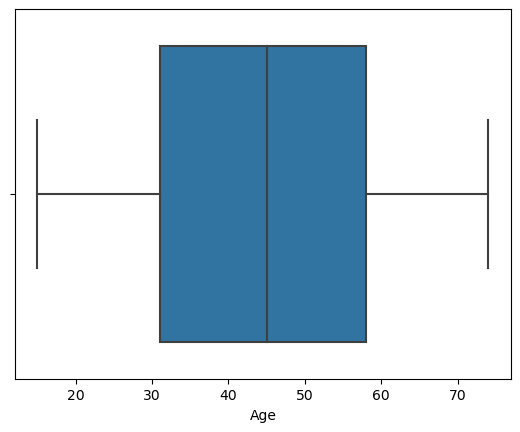

In [8]:
sns.boxplot(df.Age)

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

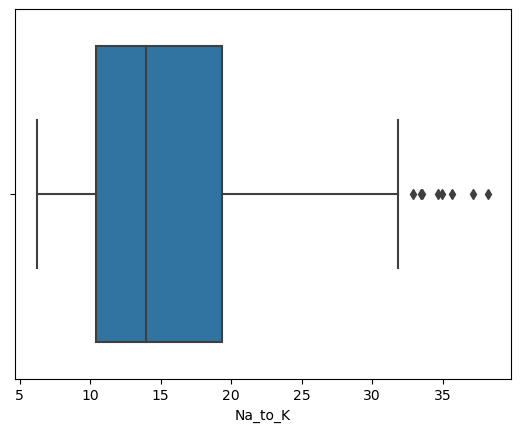

In [9]:
sns.boxplot(df.Na_to_K)

In [10]:
# Replacement of outliers using median
#Using IQR

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3 - q1

upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [11]:
df.median()

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_4992\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [12]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na_to_K'>

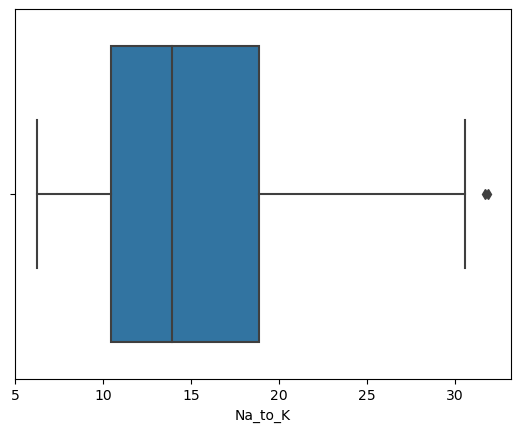

In [13]:
sns.boxplot(df.Na_to_K)

In [73]:
#One hot Coding
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [118]:
le = LabelEncoder()

In [132]:
df['Sex']= le.fit_transform(df['Sex'])
df['BP']= le.fit_transform(df['BP'])
df['Cholesterol']= le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

scalar =MinMaxScaler()
df[['Age','Na_to_K']] =scalar.fit_transform(df[['Age','Na_to_K']])

In [133]:
# Spliting the data
x = df.drop(columns=['Drug'],axis=1)

In [134]:
y =pd.get_dummies(df['Drug']).values

In [135]:
# Split the training and testing data
from sklearn.model_selection import train_test_split

In [136]:
# Splitting the data into train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)

In [207]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((160, 5), (40, 5), (160, 5), (40, 5))

In [208]:
#Task-2
from keras.models import Sequential
from keras.layers import Dense

In [209]:
# ANN Model
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [210]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [211]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 48        
                                                                 
 dense_37 (Dense)            (None, 16)                144       
                                                                 
 dense_38 (Dense)            (None, 32)                544       
                                                                 
 dense_39 (Dense)            (None, 64)                2112      
                                                                 
 dense_40 (Dense)            (None, 128)               8320      
                                                                 
 dense_41 (Dense)            (None, 5)                 645       
                                                                 
Total params: 11,813
Trainable params: 11,813
Non-trai

In [214]:
model.fit(xtrain,ytrain,epochs=50,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/50
32/32 [==============================] - 0s 11ms/step - loss: 0.1169 - accuracy: 0.9500 - val_loss: 0.5565 - val_accuracy: 0.8500
Epoch 2/50
32/32 [==============================] - 0s 10ms/step - loss: 0.1243 - accuracy: 0.9438 - val_loss: 0.6396 - val_accuracy: 0.8750
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0948 - accuracy: 0.9625 - val_loss: 0.5130 - val_accuracy: 0.8500
Epoch 4/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0875 - accuracy: 0.9563 - val_loss: 0.4758 - val_accuracy: 0.8500
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0900 - accuracy: 0.9750 - val_loss: 0.5669 - val_accuracy: 0.8000
Epoch 6/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0952 - accuracy: 0.9563 - val_loss: 0.6159 - val_accuracy: 0.8500
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0974 - accuracy: 0.9500 - val_loss: 0.7010 - val_accuracy: 0.8250
Epoch 8/50
32/32 [

In [131]:
#Task - 3
#Testing the model

In [215]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(xtrain, ytrain)
print("Train Accuracy:", train_accuracy)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 7ms/step - loss: 0.0500 - accuracy: 0.9812
Train Accuracy: 0.981249988079071
2/2 [==============================] - 0s 14ms/step - loss: 0.4148 - accuracy: 0.9500
Test Accuracy: 0.949999988079071


In [216]:
from sklearn.metrics import hamming_loss, f1_score

# Make predictions on the test data
predictions = model.predict(xtest)

# Convert probabilities to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Calculate Hamming loss
hamming_loss_value = hamming_loss(ytest, binary_predictions)

# Calculate F1-score
f1score = f1_score(ytest, binary_predictions, average='micro')


2/2 [==============================] - 0s 9ms/step


In [217]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()

In [247]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Assuming you have trained and compiled your model

# Define the specific data for testing
test_data = np.array([[0.65,1, 0,0, 0.2500],  # Example data point 1
                      [0.593, 0, 2, 0, 0.788],  # Example data point 2
                      [0.84, 1,0, 1, 0.198]])  # Example data point 3
#values here are taken in the range of xtrain data

# Load the scaler used during training
scaler = StandardScaler()
scaler.fit(xtrain)  # X_train is the training data used for scaling

# Scale the test data using the loaded scaler
test_data_scaled = scaler.transform(test_data)

# Perform inference on the test data
predictions = model.predict(test_data_scaled)
predicted_classes = np.argmax(predictions, axis=1)

# Map predicted classes back to drug labels
label_mapping = {0: "drugY", 1: "drugC", 2: "drugX",3:"drugA",4:"drugB"}
predicted_drugs = [label_mapping[predicted_class] for predicted_class in predicted_classes]

# Print the test data and predicted drug classes
for i in range(test_data.shape[0]):
    print("Test Data:", test_data[i])
    print("Predicted Drug:", predicted_drugs[i])
    print()

1/1 [==============================] - ETA: 0s

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
Test Data: [0.65 1.   0.   0.   0.25]
Predicted Drug: drugC

Test Data: [0.593 0.    2.    0.    0.788]
Predicted Drug: drugY

Test Data: [0.84  1.    0.    1.    0.198]
Predicted Drug: drugX

